# COMPUTATION

# 1. IMPORT

Importing relevent python packages

In [327]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
from numpy import random
from scipy.stats import lognorm
from scipy.integrate import fixed_quad
from scipy import interpolate
from scipy.optimize import fminbound
from scipy.optimize import minimize
from numba import njit

import matplotlib.pyplot as plt
%matplotlib inline

# 2. SIMPLE MODELS

In the following section, I will analyse this problem for 2 and 3 periods

## 2.1. Simple Two Period Problem Analysis

### 2.1.1. NO GOVERNMENT ROLE
$ U(c_0,c_1) = c_0^\gamma + \beta c_1^\gamma $

$U(k_1) = (y_0 - k_1)^\gamma + \beta \bigg\{G(y_0,k_1)\bigg\}^\gamma$ and $k_2 = 0$


In [330]:
# Parameters
α = 0.9
θ = 0.5
δ = 0.5
β = 0.90
γ = 0.9
τ = 0.2

y0 = 100

@njit
def G(y,x,k):
    return  y**α+5*x**θ+ 5*k**δ
@njit
def Utility(k):
    return -(y0 - k)**γ - β*( G(y0,x = 0,k = k) )**γ


sol2 = fminbound(Utility,1e-10,y0)

print()
print('G value is {}'.format(G(y0,x = 0, k = sol2)))
print()
print('RESULTS are as follows')
print('k1 is {}'.format(sol2))
print('Two Period Utility is {}'.format(-Utility(sol2)))
print()
vstar = -Utility(sol2)



G value is 74.6169782621094

RESULTS are as follows
k1 is 5.30956236094835
Two Period Utility is 103.70359707909577



### 2.1.2. WITH GOVERNMENT

#### AGENT UTILITY
$ U(c_0,c_1) = c_0^\gamma + \beta c_1^\gamma$

$U(k_1,k_2) = ( (1-\tau)y_0 - k_1)^\gamma + \beta \bigg\{(1-\tau)*G(y_0,x_1,k_1)\bigg\}^\gamma$ and $k_2 = 0$


#### GOVT UTILITY
$ U(g_0,g_1) = g_0^\gamma + \beta g_2^\gamma$

$W(x_1,x_2 = 0) = (\tau y_0-x_1)^\gamma + \beta (\tau y_1)^\gamma $


In [275]:
y0 = 100

def G(y = 0,x =0,k=0):
    return np.power(y,0.9)+ 10*np.power(x,0.5)+5*np.power(k,0.5)

def U(y,k =0):
    return np.power((1-τ)*y-k,γ)

def W(y,x =0):
    return np.power(τ*y -x,γ)

def objective(params):
    k,x = params
    y1 = G(y0,x,k)
    return - W(y0,x)-β* W(y1, x = 0)

def agent_cons(params):
    k,x = params
    y1 = G(y0,x,k)
    return  U(y0,k) + β*U(y1,k = 0) - vstar

def x_cons(params):
    k,x = params
    return τ*y0-x

def k_cons(params):
    k,x = params
    return (1-τ)*y0-k
    
x_con = {'type':'ineq','fun':x_cons}
k_con = {'type':'ineq','fun':k_cons}
agent_con = {'type':'ineq','fun':agent_cons}

cons = ([x_con,k_con,agent_con])
x0 = [1,1]
sol = minimize(objective,x0=x0,method = 'SLSQP',constraints= cons )
#sol
#sol.x
print('y1 is {}'.format(G(y0,sol.x[1],sol.x[0])))
print('kstar is {} and xstar is {}'.format(sol.x[0],sol.x[1]))
print('V - Vstar is {}'.format(agent_cons(sol.x)))
print('V is {}'.format(agent_cons(sol.x)+vstar))
print('Vstar is {}'.format(vstar))
print('Government Utility is {}'.format(-objective(sol.x)))

y1 is 118.42937974355134
kstar is 4.6168924409819185 and xstar is 19.882830547718182
V - Vstar is -1.1645911968116707e-07
V is 106.62544026730549
Vstar is 106.62544038376461
Government Utility is 16.71477783527004


## 2.2. Three Period Problem

### 2.2.1. NO GOVERNMENT ROLE
$ U(c_0,c_1,c_2) = c_0^\gamma + \beta c_2^\gamma + \beta^2 c_3^\gamma $

$U(k_1,k_2) = (y_0 - k_1)^\gamma + \beta \bigg\{G(y_0,k_1)-k_2\bigg\}^\gamma + \beta^2 \Bigg\{G\bigg[G(y_0,k_1),k_2\bigg]\Bigg\}^\gamma$ and $k_3 = 0$

In [332]:
from scipy.optimize import minimize

#Parameters
α = 0.9
θ = 0.5
δ = 0.5
β = 0.90
γ = 0.9

#Model Scenario
τ = 0.0
y = 100
y0 = y

def G(y=0,x=0,k=0):
    return y**α + 10*x**θ + 5*k**δ


def U(params):
    k1,k2 = params
    y1 = G(y0,0,k1)
    y2 = G(y1,0,k2)
    return -(y0 -k1)**γ - β * (y1- k2)**γ - β**2 * (y2)**γ

def k1_constraint(params):
    k1, k2 = params
    return y0-k1

def k2_constraint(params):
    k1,k2 = params
    y1 = G(y0,0,k1)
    return y1 - k2

k1_con = {'type':'ineq','fun':k1_constraint}
k2_con = {'type':'ineq','fun':k2_constraint}
cons = ([k1_con,k2_con])

x0 = [1,1]

algolist = ['SLSQP','COBYLA']

for algo in algolist:
    print('Method = {}'.format(algo))
    sol = minimize(U,x0=x0,method = algo, constraints= cons, tol= 1e-9 )
    print(sol)
    print()

vstar = -U(sol.x)

Method = SLSQP
     fun: -134.03075395204655
     jac: array([ -1.90734863e-06,  -3.81469727e-06])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([ 12.23885087,   5.24026781])

Method = COBYLA
     fun: -134.03075395212642
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 90
  status: 1
 success: True
       x: array([ 12.23889635,   5.24031471])



In [3]:
# Checking it Manually
k1 = 12.239
k2 = 5.238
y1 = G(y = y0,k = k1)
print('y1 is {}'.format(y1))
y2 = G(y = y1, k = k2)
print('y2 is {}'.format(y2))
(y0 -k1)**γ + β *( y1 - k2 )**γ + β**2*( y2 )**γ
vstar

y1 is 80.58787554052141
y2 is 63.40017948696439


134.0307538133582

134.03075395212525


### 2.2.2. WITH GOVERNMENT

#### AGENT UTILITY
$ U(c_0,c_1,c_2) = c_0^\gamma + \beta c_2^\gamma + \beta^2 c_3^\gamma $

$U(k_1,k_2) = ( (1-\tau)y_0 - k_1)^\gamma + \beta \bigg\{(1-\tau)*G(y_0,x_1,k_1)-k_2\bigg\}^\gamma + \beta^2 \Bigg\{(1-\tau)*G\bigg[G(y_0,x_1,k_1),x_2,k_2\bigg]\Bigg\}^\gamma$ and $k_3 = 0$


#### GOVT UTILITY
$ U(g_0,g_1,g_2) = g_0^\gamma + \beta g_2^\gamma + \beta^2 g_3^\gamma $

$W(x_1,x_2,x_3 = 0) = (\tau y_0-x_1)^\gamma + \beta (\tau y_1-x_2)^\gamma + \beta^2 (\tau y_2)$

In [312]:
from scipy.optimize import minimize

#Parameters
α = 0.9
θ = 0.5
δ = 0.5
β = 0.90
γ = 0.9
vstar = 134.0307

#Model Scenario
y0 = 100
τ = 0.3

def G(y = 0,x =0,k=0):
    return y**0.9+ 10*x**0.5+5*x**0.5

def U(y,k =0):
    return ( (1-τ)*y-k )**γ

def W(y,x =0):
    return ( τ*y -x )**γ


def agent_utility_cons(params):
    k1,k2,x1,x2 = params
    y1 = G(y0,x1,k1)
    y2 = G(y1,x2,k2)
    return U(y0,k1) + β*U(y1,k2) + β**2*U(y2,k = 0) - vstar -1e-3

def govt_utility_obj(params):
    k1,k2,x1,x2 = params
    y1 = G(y0,x1,k1)
    y2 = G(y1,x2,k2)
    return - W(y0,x1) - β*W(y1,x2) - β**2 * W(y2, x= 0)

# K constraints
def k1_cons(params):
    k1,k2,x1,x2 = params
    return (1-τ)*y0 - k1
def k2_cons(params):
    k1,k2,x1,x2 = params
    y1 = G(y0,x1,k1)
    return (1-τ)*y1 - k2

### X Constraints
def x1_cons(params):
    k1,k2,x1,x2 = params
    return τ*y0-x1

def x2_cons(params):
    k1,k2,x1,x2 = params
    y1 = G(y0,x1,k1)
    return τ*y1-x2

k1_con = {'type':'ineq','fun':k1_cons}
k2_con = {'type':'ineq','fun':k2_cons}
x1_con = {'type':'ineq','fun':x1_cons}
x2_con = {'type':'ineq','fun':x2_cons}
agent_con = {'type':'ineq','fun':agent_utility_cons}


cons = [k1_con,k2_con,x1_con,x2_con,agent_con]
bnds = [(1e-3, 1e5)]*4

# Iterating over different x0(starting points) and storing the results in dictionary
ans = {}
ans['x0'],ans['sol.x'],ans['govtu'],ans['agentu']  =[],[],[],[]
for i in range(50):
    x0 = np.random.randint(low = 0, high = 20,size = 4)
    sol = minimize(govt_utility_obj,
                   x0=x0,
                   method = 'SLSQP', 
                   constraints= cons,
                   tol = 1e-8,
                   bounds = bnds, 
                   options = {'maxiter':1000,'disp':False})
    ans['x0'].append(x0)
    ans['sol.x'].append(sol.x)
    ans['agentu'].append(agent_utility_cons(sol.x))
    ans['govtu'].append(-govt_utility_obj(sol.x))

# Converting Dictioarny to dataframe for analysis
anspd = pd.DataFrame(ans)

# Best Top 10 Values
anspd.sort_values('govtu',ascending = False).head(10)

# Best Value as Answer
bestid = anspd['govtu'].idxmax()
bestid
sol.x = anspd.loc[bestid]['sol.x']

# Checking the Answer
k1,k2,x1,x2 = sol.x
#k1,k2,x1,x2 = 19.401,9.04986, 9.7555, 4.797 #earliar results
k1,k2,x1,x2,y0

y1 = G(y = y0,x= x1, k = k1)
y2 = G(y = y1,x = x2, k = k2)

print('y1 is {}'.format(y1))
print('y2 is {}'.format(y2))

print('Expected Present Value of Agent Utility(U) is ', 
      ((1-τ)*y0 -k1)**γ + β* ( (1-τ)*y1 - k2 )**γ + β**2 *( (1-τ)*y2 )**γ )
print('Expected Present Value of Govt Utility(W) is ',
      ( τ*y0 -x1 )**γ + β* ( τ*y1 -x2 )**γ + β**2 * ( τ*y2 )**γ )


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


,agentu,govtu,sol.x,x0
31,-9.345821e-09,50.240634,"[0.001, 0.001, 13.1206882844, 6.38026333909]","[17, 6, 18, 17]"
6,-7.354311e-09,50.240634,"[0.001, 0.001, 13.1207181543, 6.38022869186]","[2, 11, 14, 13]"
30,-7.474052e-09,50.240634,"[0.001, 0.001, 13.1206930043, 6.38025786585]","[10, 15, 15, 14]"
33,-7.295848e-09,50.240634,"[0.001, 0.00100000000001, 13.1207022148, 6.380...","[3, 11, 17, 17]"
21,-5.764628e-09,50.240634,"[0.001, 0.001, 13.120717521, 6.38022942822]","[18, 5, 10, 9]"
4,-5.035356e-09,50.240634,"[0.001, 0.001, 13.1207064851, 6.38024223052]","[9, 13, 1, 5]"
12,-3.983440e-09,50.240634,"[0.001, 0.001, 13.1207100812, 6.38023806018]","[15, 6, 5, 5]"
34,-3.585650e-09,50.240634,"[0.001, 0.001, 13.1207104838, 6.38023759356]","[11, 12, 0, 10]"
40,-1.503646e-09,50.240634,"[0.001, 0.001, 13.1207152671, 6.38023204703]","[8, 4, 0, 0]"
19,-1.647829e-09,50.240634,"[0.001, 0.001, 13.1207348875, 6.38020928723]","[6, 14, 18, 2]"


31

(0.001000000000004511,
 0.0010000000000016959,
 13.120688284384061,
 6.3802633390850607,
 100)

y1 is 117.42947041368262
y2 is 110.80083867539216
Expected Present Value of Agent Utility(U) is  134.031699991
Expected Present Value of Govt Utility(W) is  50.240634257


## 2.3 N Period Model


Now lets try out the n period model,

### 2.3.1. WITHOUT GOVERNMENT

In [286]:
from scipy.optimize import minimize

def nogovt_nperiod_dynamic_squared_model(n = 3,
                                        y0 = 100, 
                                        k_bound = (1e-2,1e2),
                                        x0_bound = (0,20),
                                        x0_iter = 10,
                                        algo = 'SLSQP',
                                       max_algo_iter = 100,
                                       tol = 1e-5,
                                        show_output = True):
    """
    
    Its function with uses SCIPY optimize.minimize.SLSQP algorithms to generate the optimal captial accumulaton path
    n = number of periods of the model,
    y0 = starting value of the state,
    k_bound = input as (lower bound, upper bound) on k values in period,
    x0_bound = bound on the starting values x0,
    x0_iter = no. of x0 values to choose,
    algo = choosen alogrithm of scipy.minimize, could be 'SLSQP' or 'COBYLA'(much faster),
    max_algo_iter = maximum number of iterations choosen algo, 
    tol = tolerance for running algo ,
    show_output = prints the results of state, capital and expected agent utiltiy
    
    NOTE: k_bounds will not work with 'COBYLA' but COBY
    
    """
    # Model Paramters 
    α = 0.9
    θ = 0.5
    δ = 0.5
    β = 0.90
    γ = 0.9
    τ = 0
    ### Model functions of State and Utility
    def G(y = 0,x =0,k=0):
        return y**α+ 10*x**θ+5*k**δ

    def U(y,k =0):
        return ((1-τ)*y-k)**γ

    def make_y(y0,params):
        k = params
        y = np.zeros(n)
        i = 0
        y[i] = y0 # First assignmen out of n number of elements dones
        while i < (n-1): # Doing rest of the assignment for remaining n-1 elements in y
            y[i+1] = G(y= y[i],k = k[i],x = 0)
            i = i+1
        return y

    ### Creating the constraints functions
    def make_k_fun(i):
        def temp_k_fun(params):
            k = params
            y = make_y(y0,k)
            return (1-τ)*y[i] - k[i] -.001 # 001 has been used to make k stricly less (1-τ)y
        return temp_k_fun
    """
    NOTE:  k1, k2, ...k(n-1) constrains are made using make_k_fun , it just 
           put upper bound on k[i] to be (1-τ)*y[i-1] for i <= n-1
           
           For k[n] constraint, we have to set k[n] = 0, as the agent would not 
           like to save any capital for investment in n+1 period. It is achieved
           by lambda expression.
    
    """
    
    k_cons = [{'type':'ineq', 'fun': make_k_fun(i)} for i in np.arange(n-1)] + [{'type':'ineq',
                                                                               'fun': lambda params: params[n-1]}]


    ### Creating the Agent Utility Functions
    def objective(params):
        k = params
        y = make_y(y0,params)
        def period_utility(i):
            return β**i*U(y = y[i],k = k[i])
        u = 0
        for j in range(n):
            u = u - period_utility(i = j)
        return u

    ### Assigning the bounds
    bnds = [k_bound]*n # between (1,100) for each variable

    ### Iterating over different x0(starting points) and storing the results in dictionary
    ans = {}
    ans['x0'],ans['sol.x'],ans['agentu']  =[],[],[]
    for i in range(x0_iter): #Checking random iterations of x0
        x0 = np.random.randint(low = x0_bound[0], high = x0_bound[1],size = n)
        sol = minimize(objective,
                   x0,
                   method = algo,
                   constraints= k_cons,
                   bounds = bnds,
                   tol = tol,
                  options = {'maxiter':max_algo_iter})
        ans['x0'].append(x0)
        ans['sol.x'].append(sol.x)
        ans['agentu'].append(-objective(sol.x))

    # Converting Dictioarny to dataframe for analysis
    df = pd.DataFrame(ans)

    ### Reporting the final results
    # Best Value as Answer
    bestid = df['agentu'].idxmax()
    sol.x = df.loc[bestid]['sol.x']
    y = make_y(y0,sol.x)

    # Printing out the results
    if show_output:
        print('k values are ',np.around(sol.x,2 ) )
        print('State Sequence of y is ',np.round(y,3))
        print('Agent Utility is ',np.round(-objective(sol.x),3))
    
    # Returning Best Top 5 Values to see the stability of the solution
    return(df.sort_values('agentu',ascending = False).head(5))


### TESTING THE MODEL FOR SOME SAMPLE RUNS

#### 1. THREE PERIOD MODEL

In [287]:

nogovt_nperiod_dynamic_squared_model(algo='SLSQP')

k values are  [  1.22400000e+01   5.24000000e+00   1.00000000e-02]
State Sequence of y is  [ 100.      80.588   63.403]
Agent Utility is  134.026


,agentu,sol.x,x0
1,134.025940,"[12.2388970903, 5.24093673609, 0.01]","[18, 3, 2]"
4,134.025940,"[12.2392530452, 5.23963994842, 0.0100000000003]","[6, 12, 19]"
5,134.025940,"[12.2367996798, 5.23980886164, 0.01]","[15, 2, 1]"
6,134.025939,"[12.2341367894, 5.23923415608, 0.0100000000003]","[16, 16, 14]"
3,134.025939,"[12.2358387269, 5.24401682782, 0.01]","[12, 18, 1]"


#### 2. FIVE PERIOD MODEL

In [288]:
# 5 Period Model
nogovt_nperiod_dynamic_squared_model(n=5,x0_iter= 30,k_bound=(0,20))

k values are  [ 19.83  16.89  12.06   5.17   0.  ]
State Sequence of y is  [ 100.      85.36    75.265   66.223   54.912]
Agent Utility is  179.556


,agentu,sol.x,x0
25,179.556068,"[19.8275815109, 16.8878134268, 12.0624294335, ...","[7, 13, 12, 9, 4]"
7,179.556068,"[19.8306389884, 16.8870376448, 12.0661058371, ...","[4, 0, 12, 1, 15]"
14,179.556068,"[19.829713597, 16.8826738036, 12.0577433735, 5...","[10, 5, 0, 6, 15]"
27,179.556067,"[19.8377405105, 16.8841089598, 12.0666578771, ...","[6, 8, 12, 0, 8]"
0,179.556067,"[19.8395321359, 16.8872056243, 12.0636882038, ...","[0, 3, 1, 14, 0]"


#### 3. TEN PERIOD MODEL

In [283]:
# 10 Period Model
nogovt_nperiod_dynamic_squared_model(n=10,x0_iter= 30,k_bound=(0,30), x0_bound=(0,30))

k values are  [ 23.2   22.94  22.58  22.01  21.09  19.46  16.65  11.95   5.14   0.  ]
State Sequence of y is  [ 100.      87.18    79.717   75.209   72.28    70.075   67.873   64.921
   60.053   51.205]
Agent Utility is  252.292


,agentu,sol.x,x0
11,252.291543,"[23.2023657709, 22.9437091468, 22.5780464675, ...","[6, 9, 0, 17, 12, 8, 25, 28, 23, 17]"
2,252.291542,"[23.2088923824, 22.9295884979, 22.5666275483, ...","[25, 17, 23, 0, 15, 28, 12, 21, 24, 18]"
4,252.291542,"[23.1952598304, 22.9487999677, 22.5819583722, ...","[7, 27, 2, 24, 28, 17, 2, 5, 16, 10]"
5,252.291541,"[23.1918736095, 22.9273604868, 22.5811377126, ...","[10, 15, 5, 23, 29, 3, 6, 27, 23, 22]"
16,252.291541,"[23.1913582996, 22.9391845021, 22.5786684724, ...","[17, 13, 3, 24, 11, 14, 4, 17, 13, 6]"


#### 4. TWENY PERIOD MODEL 

In [256]:
# 20 Period Model #Using SLSQP
nogovt_nperiod_dynamic_squared_model(n=20,x0_iter= 30,k_bound=(0,30),x0_bound=(0,30))

k values are  [ 23.41  23.23  23.14  23.05  23.05  22.99  22.94  22.89  22.89  22.83
  22.79  22.66  22.39  21.89  20.97  19.37  16.59  11.95   5.12   0.  ]
State Sequence of y is  [ 100.      87.288   79.926   75.626   73.075   71.584   70.674   70.114
   69.76    69.549   69.398   69.286   69.151   68.931   68.537   67.807
   66.482   64.063   59.543   50.879]
Agent Utility is  319.011


,agentu,sol.x,x0
16,319.011011,"[23.4101732261, 23.2263852294, 23.1429091152, ...","[8, 7, 13, 5, 13, 15, 7, 8, 17, 7, 13, 13, 11,..."
11,319.011009,"[23.3317340627, 23.2534890478, 23.1538089826, ...","[17, 17, 4, 16, 3, 1, 12, 15, 6, 10, 10, 10, 3..."
3,319.010999,"[23.3363445331, 23.2509443846, 23.1692374339, ...","[14, 6, 7, 13, 11, 11, 7, 16, 5, 4, 17, 8, 3, ..."
28,319.010981,"[23.3405237189, 23.2805723812, 23.1196291549, ...","[10, 7, 3, 7, 1, 1, 15, 12, 16, 18, 17, 18, 3,..."
29,319.010977,"[23.3382651523, 23.2720169905, 23.177611565, 2...","[15, 10, 14, 8, 16, 10, 1, 9, 5, 19, 5, 13, 15..."


In [263]:
# 20 Period Model #Using COBYLA
nogovt_nperiod_dynamic_squared_model(n=20,
                                    x0_iter= 30,
                                    k_bound=(0,30),
                                    x0_bound=(0,30),
                                    max_algo_iter=200,
                                    algo='COBYLA')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:400: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)


k values are  [ 23.38  23.25  23.21  23.02  23.01  23.04  23.18  22.92  22.78  22.78
  22.71  22.43  22.08  21.69  20.96  19.26  16.62  11.65   5.13  -0.03]
State Sequence of y is  [ 100.      87.27    79.929   75.66    73.078   71.565   70.689   70.251
   69.857   69.553   69.374   69.228   68.999   68.678   68.278   67.649
   66.33    63.989   59.287   50.745]
Agent Utility is  319.013


,agentu,sol.x,x0
8,319.012775,"[23.3762387108, 23.2521672318, 23.2050892733, ...","[13, 14, 12, 4, 12, 18, 3, 16, 15, 7, 18, 12, ..."
27,319.011953,"[23.5916757056, 23.2851900273, 23.1302920699, ...","[17, 6, 17, 28, 29, 6, 2, 14, 4, 26, 6, 13, 22..."
22,319.010187,"[23.3567037448, 23.3278992233, 23.06899853, 23...","[28, 9, 22, 6, 5, 29, 26, 11, 11, 12, 24, 8, 1..."
1,319.009684,"[23.4301236029, 23.265604297, 22.910804724, 22...","[16, 29, 7, 14, 14, 4, 9, 10, 27, 15, 18, 16, ..."
12,319.009470,"[23.3178717086, 23.2164416996, 22.8708783761, ...","[21, 26, 24, 3, 22, 12, 12, 7, 2, 27, 18, 23, ..."


#### 4. FIFTY PERIOD MODEL

In [264]:
# 50 Period Model
nogovt_nperiod_dynamic_squared_model(n=50,
                                    x0_iter= 20,
                                    k_bound=(0,30),
                                    max_algo_iter=500,
                                    x0_bound=(0,30),
                                    algo='COBYLA')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:400: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


k values are  [  2.37000000e+01   2.31400000e+01   2.29200000e+01   2.28800000e+01
   2.34200000e+01   2.24600000e+01   2.28500000e+01   2.26000000e+01
   2.27000000e+01   2.24500000e+01   2.26800000e+01   2.33100000e+01
   2.29900000e+01   2.27600000e+01   2.25700000e+01   2.26400000e+01
   2.23400000e+01   2.28100000e+01   2.29500000e+01   2.25300000e+01
   2.35100000e+01   2.33800000e+01   2.28400000e+01   2.30200000e+01
   2.30300000e+01   2.29900000e+01   2.38000000e+01   2.16000000e+01
   2.19100000e+01   2.36600000e+01   2.02600000e+01   2.21900000e+01
   1.91100000e+01   2.47800000e+01   2.06300000e+01   1.66100000e+01
   2.72500000e+01   2.28600000e+01   1.76200000e+01   1.52100000e+01
   1.83700000e+01   1.91500000e+01   2.41400000e+01   1.30500000e+01
   2.50400000e+01   1.17800000e+01   1.83000000e+01   9.45000000e+00
   4.89000000e+00   1.00000000e-02]
State Sequence of y is  [ 100.      87.436   79.965   75.534   72.934   71.691   70.46    69.945
   69.507   69.301   69.0

,agentu,sol.x,x0
17,353.107785,"[23.6976587244, 23.138964942, 22.9220527027, 2...","[25, 11, 25, 12, 14, 29, 28, 22, 23, 15, 22, 1..."
5,353.090714,"[23.0963920254, 22.6484350537, 22.9487923748, ...","[15, 9, 12, 29, 22, 22, 10, 11, 9, 13, 10, 17,..."
16,353.075686,"[22.8697079066, 23.1959952161, 23.3967297003, ...","[23, 15, 17, 18, 19, 13, 11, 28, 17, 14, 8, 22..."
4,353.044209,"[22.742962892, 23.2797425977, 23.068331227, 23...","[29, 21, 25, 24, 4, 27, 9, 22, 0, 12, 9, 16, 2..."
18,353.042190,"[23.1127455378, 23.518048075, 23.3395992278, 2...","[22, 25, 11, 20, 15, 18, 18, 23, 13, 21, 14, 1..."


#### 5. HUNDRED PERIOD MODEL

In [265]:
# 100 Period Model
nogovt_nperiod_dynamic_squared_model(n=50,
                                    x0_iter= 20,
                                    k_bound=(0,30),
                                    max_algo_iter=1000,
                                    x0_bound=(0,30),
                                    algo='COBYLA')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:400: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


k values are  [ 23.37  23.13  23.19  23.15  23.08  23.    23.01  23.07  23.01  23.    22.54
  22.87  22.94  22.85  22.99  23.27  22.83  22.79  23.17  22.95  23.09
  22.84  22.73  22.98  23.11  23.28  22.63  22.77  22.82  22.7   22.68
  23.08  22.45  21.42  20.92  21.47  20.36  19.57  20.78  21.33  21.7
  22.14  21.36  21.1   19.79  22.5   18.75  10.34   5.14   0.  ]
State Sequence of y is  [ 100.      87.265   79.862   75.613   73.117   71.624   70.703   70.167
   69.883   69.687   69.563   69.25    69.238   69.271   69.242   69.301
   69.48    69.353   69.26    69.404   69.373   69.43    69.333   69.215
   69.28    69.385   69.533   69.283   69.209   69.188   69.113   69.058
   69.235   69.01    68.33    67.658   67.559   66.893   66.057   66.234
   66.642   67.082   67.577   67.45    67.233   66.384   67.352   65.86
   59.408   50.828]
Agent Utility is  353.162


,agentu,sol.x,x0
11,353.162391,"[23.3663186335, 23.1297380652, 23.1888040071, ...","[25, 2, 3, 15, 13, 22, 25, 17, 2, 20, 7, 18, 2..."
4,353.162201,"[23.4965375904, 23.2662960037, 23.2712032666, ...","[18, 17, 29, 11, 27, 16, 28, 27, 17, 5, 28, 26..."
5,353.159885,"[23.4999483317, 23.3894869853, 23.08865385, 23...","[0, 29, 29, 1, 8, 12, 2, 28, 27, 22, 26, 2, 12..."
0,353.159874,"[23.4539757088, 23.1502959408, 23.2808652467, ...","[13, 17, 26, 15, 13, 27, 1, 19, 27, 2, 16, 2, ..."
16,353.154640,"[23.6888194713, 23.0941518659, 23.2059325126, ...","[10, 20, 22, 19, 25, 8, 9, 17, 2, 23, 7, 9, 3,..."



### 2.3.2. WITH GOVERNMENT

In [307]:
from scipy.optimize import minimize

def withgovt_nperiod_dynamic_squared_model(n = 3,
                                        y0 = 100,
                                        τ = 0.2,
                                        vstar = 0, 
                                        k_bound = (1e-2,50),
                                        x_bound = (1e-2,50),
                                        x0_bound = (0,20),
                                        x0_iter = 10,
                                        algo = 'SLSQP',
                                       max_algo_iter = 100,
                                       tol = 1e-5,
                                       show_output = True):
    """
    
    Its function with uses SCIPY optimize.minimize.SLSQP algorithms to generate the optimal captial accumulaton path
    n = number of periods of the model,
    y0 = starting value of the state,
    vstar = utility value of the agent without any government role
    τ = tax rate
    k_bound = input as (lower bound, upper bound) on k values in periods,
    x_bound = input as (lower bound, upper bound) on x values in periods,
    x0_bound = bound on the starting values x0,
    x0_iter = no. of x0 values to choose,
    algo = choosen alogrithm of scipy.minimize, could be 'SLSQP' or 'COBYLA'(much faster),
    max_algo_iter = maximum number of iterations choosen algo, 
    tol = tolerance for running algo ,
    
    NOTE: k_bounds will not work with 'COBYLA' but COBY
    
    """
    # Model Paramters 
    α = 0.9
    θ = 0.5
    δ = 0.5
    β = 0.90
    γ = 0.9
    
    ### Model functions of State and Utility
    def G(y = 0,x =0,k=0):
        return y**α+ 10*x**θ+5*k**δ

    def U(y,k =0):
        return ((1-τ)*y-k)**γ

    def W(y,x =0):
        return ( τ*y -x )**γ
    
    def make_y(y0,params):
        k,x = np.split(params,2)
        y = np.zeros(n)
        i = 0
        y[i] = y0 # First assignmen out of n number of elements dones
        while i < (n-1): # Doing rest of the assignment for remaining n-1 elements in y
            y[i+1] = G(y= y[i],k = k[i],x = x[i])
            i = i+1
        return y

    ### Creating the constraints functions
    def make_k_fun(i): # Creating a function which creates a functions
        def temp_k_fun(params): # Creating a return function
            k,x = np.split(params,2)
            y = make_y(y0,params)
            return (1-τ)*y[i] - k[i] -.001 # 001 has been used to make k stricly less (1-τ)y
        return temp_k_fun
    """
    NOTE:  k1, k2, ...k(n-1) constrains are made using make_k_fun , it just 
           put upper bound on k[i] to be (1-τ)*y[i-1] for i <= n-1
           
           For k[n] constraint, we have to set k[n] = 0, as the agent would not 
           like to save any capital for investment in n+1 period. It is achieved
           by lambda expression.
    
    """
    k_cons = [{'type':'ineq', 'fun': make_k_fun(i)} for i in np.arange(n-1)] + [{'type':'ineq',
                                                                               'fun': lambda params: params[n-1]}]
    
    def make_x_fun(i): # Creating a function which creates a functions
        def temp_x_fun(params): # Creating a return function
            k,x = np.split(params,2)
            y = make_y(y0,params)
            return τ*y[i] - x[i] -.001 # 001 has been used to make x stricly less τy
        return temp_x_fun
    
    """
    NOTE:  x1, x2, ...x(n-1) constrains are made using make_x_fun , it just 
           put upper bound on x[i] to be (τ)*y[i-1] for i <= n-1
           
           For x[n] constraint, we have to set x[n] = 0, as the principal(govt) would not 
           like to save any capital for investment in n+1 period. It is achieved
           by lambda expression.
           x[n] = params[2n-1]
    
    """
    x_cons = [{'type':'ineq', 'fun': make_x_fun(i)} for i in np.arange(n-1)] + [{'type':'ineq',
                                                                               'fun': lambda params: params[2*n-1]}]
    
   
    
    ### Creating the Agent Utility Constraint
    
    def agent_con(params):
        k,x = np.split(params,2)
        y = make_y(y0,params)
        def period_utility(i):
            return β**i*U(y = y[i],k = k[i])
        u = 0
        for j in range(n):
            u = u + period_utility(i = j)
        return u - vstar - 0.001 # Here .001 makes u strictly greater than vstar
        
    
     #Combining both k_cons,x_cons, agent cons
    cons = k_cons + x_cons + [{'type':'ineq','fun':agent_con}]
    
    ### Creating the Govt Utility Functions
    def objective(params):
        k,x = np.split(params,2)
        y = make_y(y0,params)
        def period_utility(i):
            return β**i*W(y = y[i],x = x[i])
        v = 0
        for j in range(n):
            v = v - period_utility(i = j)
        return v

    ### Assigning the bounds
    k_bnds = [k_bound]*n # Bounds for k = private investment
    x_bnds = [x_bound]*n # Bounds for x = public investment
    bnds = k_bnds + x_bnds
    
    ### Iterating over different x0(starting points) and storing the results in dictionary
    ans = {}
    ans['x0'],ans['sol.x'],ans['govtu'],ans['agentu']  =[],[],[],[]
    for i in range(x0_iter): #Checking random iterations of x0
        x0 = np.random.randint(low = x0_bound[0], high = x0_bound[1],size = 2*n)
        sol = minimize(objective,
                   x0,
                   method = algo,
                   constraints= cons,
                   bounds = bnds,
                   tol = tol,
                  options = {'maxiter':max_algo_iter})
        ans['x0'].append(x0)
        ans['sol.x'].append(sol.x)
        ans['govtu'].append(-objective(sol.x))
        ans['agentu'].append(vstar + agent_con(sol.x))

    # Converting Dictioarny to dataframe for analysis
    df = pd.DataFrame(ans)

    ### Reporting the final results
    # Best Value as Answer
    bestid = df['govtu'].idxmax()
    sol.x = df.loc[bestid]['sol.x']
    y = make_y(y0,sol.x)

    # Printing out the results
    if show_output:
        print('k values are ',np.around(sol.x[:n],2 ) )
        print('x value are ',np.around(sol.x[n:2*n],2 ) )
        print('State Sequence of y is ',np.round(y,3))
        print('Govt Utility is ',np.round(-objective(sol.x),3))
        print('Agent Utility is ',np.round(vstar + agent_con(sol.x),3))
    
    # Returning Best Top 5 Values to see the stability of the solution
    return(df.sort_values('govtu',ascending = False).head(5))


In [322]:
withgovt_nperiod_dynamic_squared_model(n = 3,
                                       x0_iter = 1000,
                                       algo= 'COBYLA',
                                        x_bound = (1e-5,30),
                                       k_bound = (1e-5,30),
                                       vstar = 134.0307,
                                       max_algo_iter = 1000,
                                       τ= 0.3,
                                      tol = 1e-9
                                      )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:400: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


k values are  [ 12.29   5.77   0.  ]
x value are  [ 23.92  13.79  -0.  ]
State Sequence of y is  [ 100.     129.533  128.786]
Govt Utility is  43.141
Agent Utility is  134.031


,agentu,govtu,sol.x,x0
13,134.0307,43.141429,"[12.2932752785, 5.76831444192, 7.71813681295e-...","[18, 19, 13, 19, 9, 10]"
470,134.0307,43.141429,"[12.2932762921, 5.76831505282, -5.10984651357e...","[5, 6, 13, 1, 14, 4]"
676,134.0307,43.141429,"[12.2932766634, 5.76831390542, 3.88774456404e-...","[9, 9, 0, 14, 17, 7]"
451,134.0307,43.141429,"[12.2932754498, 5.76831478302, 1.67719389271e-...","[0, 19, 14, 7, 4, 17]"
647,134.0307,43.141429,"[12.2932754433, 5.76831428881, -1.39112256035e...","[6, 12, 11, 11, 15, 10]"


In [324]:
withgovt_nperiod_dynamic_squared_model(n = 50,
                                       x0_iter = 10,
                                       algo= 'COBYLA',
                                        x_bound = (1e-5,30),
                                       k_bound = (1e-5,30),
                                       vstar = 354,
                                       max_algo_iter = 1000,
                                       τ= 0.3,
                                      tol = 1e-9
                                      )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:400: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


k values are  [ 68.55  70.18  58.66  59.47  52.27  47.37  50.99  47.52  39.24  42.41
  34.05  32.23  36.26  27.79  25.3   25.94  34.29  32.54  17.93  23.2
  27.32  19.24  15.64  20.77  20.35  24.11  23.03  12.95  16.89  10.09
  20.88  22.04  16.04  18.86   4.94  12.08  20.27  11.97   8.67  19.51
  15.15  15.11   4.58   9.18  16.52   3.6   19.13  10.07  14.6    4.35]
x value are  [  4.63   7.33   5.99   7.89   7.17   8.15   7.92   6.51   7.35   7.35
   7.95   6.66   7.17   7.68   6.55   6.83   7.81   7.41   7.84   6.63
   7.43  10.24   7.01   6.25   6.64  10.69   7.17  10.86  12.05   6.29
  11.14  11.87   7.82  12.57   5.83   9.21  12.02  14.23   6.38   6.99
  13.89  10.5    2.96  12.67  18.89  16.3   14.96   2.72   2.6   10.6 ]
State Sequence of y is  [ 100.     126.02   146.654  151.828  158.525  158.437  158.429  159.314
  155.929  152.536  151.928  149.301  144.7    144.869  142.145  137.326
  135.536  140.18   141.26   135.281  132.641  134.754  136.458  129.706
  127.518  126.854 

,agentu,govtu,sol.x,x0
9,349.688498,245.181978,"[68.5490488948, 70.1809828695, 58.6550597763, ...","[0, 19, 2, 17, 6, 0, 17, 14, 7, 14, 3, 5, 12, ..."
4,353.367077,245.002308,"[69.9633690957, 64.0901615267, 65.3001244899, ...","[19, 1, 19, 12, 12, 0, 6, 14, 14, 5, 4, 13, 7,..."
3,354.254745,244.924534,"[69.999, 65.4018013174, 60.9394424773, 59.5941...","[12, 15, 12, 15, 17, 5, 15, 13, 12, 6, 6, 7, 0..."
7,354.605480,244.644197,"[68.1439488331, 65.0613515556, 61.7382984921, ...","[0, 11, 14, 11, 10, 9, 1, 2, 19, 2, 12, 15, 13..."
0,362.251780,243.064811,"[65.0779886938, 60.6326926981, 59.9239516543, ...","[4, 2, 15, 13, 19, 19, 16, 14, 0, 19, 5, 5, 18..."


#### HUNDRED PERIOD MODEL

In [335]:
algo  = 'COBYLA'
withgovt_nperiod_dynamic_squared_model(n = 100,
                                       x0_iter = 30,
                                       algo= algo,
                                        x_bound = (1e-5,30),
                                       k_bound = (1e-5,30),
                                       vstar = 354,
                                       max_algo_iter = 1500,
                                       τ= 0.3,
                                      tol = 1e-5
                                      )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:400: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


k values are  [ 60.78  56.38  57.44  49.85  48.06  42.78  42.05  37.27  44.13  39.21
  38.87  29.23  32.31  32.5   23.48  21.97  21.38  21.97  18.28  18.42
  24.55  14.99  26.12  13.79  24.12  11.18  19.44  12.77  12.34   7.08
  14.14  13.84  20.14  22.94  19.94   6.68   5.69  16.5    8.42   5.32
  14.25  20.82  14.13   6.84  21.21  19.67  20.61   2.29  18.17   1.91
   6.57   9.88  13.94  16.07   5.54   9.38   2.41   7.78   5.04  16.94
   5.34  16.83  18.67   4.74  15.28  18.48   3.75   8.07   8.46   1.37
   7.14  16.96  16.88  14.09   8.7    5.38  11.18  13.98  12.75   9.72
  12.57  18.62   4.63  14.6   14.35  14.31   7.83  18.6   14.49   6.28
   9.02  13.95  12.68   8.89   4.37  14.18  17.48   8.68  18.07   3.35]
x value are  [  7.7    7.32   6.8    6.6    7.86   9.09   6.69   7.23   7.78   7.22
   7.64   6.8    7.37   7.56   7.5    7.72   7.72   8.74   8.31   9.68
   6.6    8.64   6.95   9.96   5.89  12.35   9.89   6.62  10.44  12.43
   8.89   7.44   7.41   7.54   5.87  11.53   6.05

,agentu,govtu,sol.x,x0
23,377.348529,240.127670,"[60.7841779679, 56.3757031155, 57.4352737957, ...","[3, 2, 18, 8, 12, 5, 11, 1, 19, 17, 19, 0, 15,..."
10,383.695038,236.927282,"[59.1946632769, 56.6198242222, 52.6640766204, ...","[15, 19, 17, 14, 14, 11, 14, 11, 11, 2, 2, 18,..."
18,432.930343,213.274775,"[32.6401360944, 32.2448485909, 27.2157827174, ...","[17, 18, 13, 11, 3, 16, 17, 19, 18, 16, 1, 11,..."
2,440.222610,208.298667,"[28.3322056245, 30.3075528193, 25.9625177057, ...","[11, 17, 11, 12, 13, 5, 9, 17, 4, 1, 9, 2, 13,..."
27,446.325816,204.268723,"[22.2182784523, 19.9637023545, 26.0172624039, ...","[6, 4, 17, 7, 8, 13, 12, 16, 12, 5, 0, 11, 3, ..."


In [336]:
algo  = 'SLSQP'
withgovt_nperiod_dynamic_squared_model(n = 100,
                                       x0_iter = 10,
                                       algo= algo,
                                        x_bound = (1e-5,30),
                                       k_bound = (1e-5,30),
                                       vstar = 354,
                                       max_algo_iter = 1000,
                                       τ= 0.3,
                                      tol = 1e-5
                                      )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 

### Checking the Convergence of G (state) Function

(0.0, 435.01854451434292)

(0.0, 451.0)

(-22.5, 472.5, -22.5, 472.5)

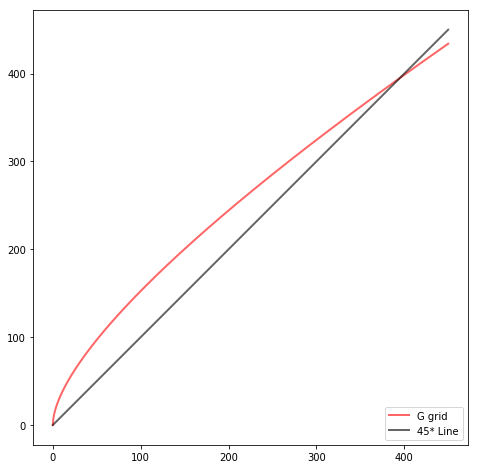

y is 800 and G(y) is  662.9795048555535
y is 662.9795048555535 and G(y) is  576.5189453066625
y is 576.5189453066625 and G(y) is  520.0630145594624
y is 520.0630145594624 and G(y) is  482.23287651454
y is 482.23287651454 and G(y) is  456.38916338757116
y is 456.38916338757116 and G(y) is  438.4800602238075
y is 438.4800602238075 and G(y) is  425.93868487026464
y is 425.93868487026464 and G(y) is  417.0887421413
y is 417.0887421413 and G(y) is  410.8088323165674
y is 410.8088323165674 and G(y) is  406.33458618017556
y is 406.33458618017556 and G(y) is  403.1374910138071
y is 403.1374910138071 and G(y) is  400.84816000488587
y is 400.84816000488587 and G(y) is  399.20634615807626
y is 399.20634615807626 and G(y) is  398.0276088406805
y is 398.0276088406805 and G(y) is  397.180664924472
y is 397.180664924472 and G(y) is  396.5717725075525
y is 396.5717725075525 and G(y) is  396.1338418197944
y is 396.1338418197944 and G(y) is  395.8187776121176
y is 395.8187776121176 and G(y) is  395.5920

395.00958468538806

217.24353962944602

In [379]:
def G(y = 0,x =0,k=0):
    return np.power(y,0.9)+ 10*np.power(x,0.5)+5*np.power(k,0.5)



# Checking out concavity of G function
y_grid = np.linspace(0,450,1000)
g_grid = []    
for y in y_grid:
    ans = G(y = y, x = τ*y, k = (1-τ)*y)
    g_grid.append(ans)

g_grid = np.asarray(g_grid)

%matplotlib inline

fig,ax = plt.subplots(figsize=(8,8))
lb = 'G grid'
ax.plot(y_grid,g_grid,color = 'red', lw = 2, alpha = 0.6, label = lb)
lb = '45* Line'
ax.plot(y_grid,y_grid,color = 'black', lw = 2, alpha = 0.6, label = lb)


ax.set_ylim( np.min(g_grid), np.max(g_grid)+1 )
ax.set_xlim( np.min(y_grid),np.max(y_grid) +1)
ax.legend(loc = 'lower right')
plt.axis('scaled')
plt.show();
y = 800
for i in range(100):
    print('y is {} and G(y) is  {}'.format(y,G(y,x = τ*y,k = (1-τ)*y)))
    y = G(y,x = τ*y,k = (1-τ)*y)
y
G(y)

# 3. PROGRAM CODE

This section contains the code for the program

In [411]:
class DynamicProgrammingSquaredModel:
    """
    Docstrings
    """
    
    def __init__(self,
                β = 0.96 ,
                γ = 0.96,
                τ = 0.2,
                μ = 0,
                s = 0.1,
                α = 0.9,
                δ = 0.5,
                θ = 0.5,
                seed = 100,
                shock_size = 100 ,
                y_min = 1e-5,
                y_max = 5,
                y_grid_size = 100
                ):
        #### Assigning Parameters
        
        # Model Parameters
        self.β, self.γ, self.τ = β, γ, τ
        
        # State Function G Parameters assignement
        self.α, self.δ, self.θ = α, δ, θ
        
        # Shocks Parameters
        self.s, self.μ, self.shock_size, self.seed  = s, μ, shock_size, seed
        
        #Setting up shocks in the models
        np.random.seed(self.seed) # setting seed to generate same random numbers
        self.shocks = np.exp( self.μ + self.s * np.random.randn(self.shock_size)  )
        
        #Y Grid State Allocation
        self.y_min, self.y_max, self.y_grid_size  = y_min, y_max, y_grid_size
        self.y_grid = np.linspace(self.y_min, self.y_max, self.y_grid_size)
        
    
    def initial_v(self):
        return np.sqrt(self.y_grid)
        #return self.y_grid
        #return 10*np.log(self.y_grid)
        
    
    def U(self,y,k,τ):
        'Calculates utility of Agents'
        return np.power( (1-τ)*y-k ,0.9)
    
    
    def W(self,y,x,τ):
        'Calculates the utility of Principal(Government)'
        return np.power(τ*y - x,0.9)
    
    
    def G(self, y,x, k):
        'G is state transition function'
        return (y**self.α+ 10*x**self.θ + 5*k**self.δ )*self.shocks
    
    
    def bellman_operator_v(self, v, x = 0, τ = 0, Tv = None):
        """
        It runs of consumers utility equation
        """
        ### Applying Linear Interpolation
        fv = interpolate.interp1d(self.y_grid, v,fill_value='extrapolate')
        
        # Intialized Compute policy if needed
        σ_v = np.empty_like(v)
        
        ## Intialized Tv if necessary ###
        if Tv is None:
            Tv = np.empty_like(v)
    
        # Set Tv[i] = max_k { u[ (1-τ)y - k ] + β E[ v( G(y, x,k,z) ) ] }
        for i, y in enumerate(self.y_grid):
            def objective(k):
                return -self.U(y = y, k = k, τ = τ) - self.β*np.mean( fv( self.G(y = y, x =x, k = k) ) )
            k_star = fminbound(objective, 1e-10, (1-τ)*y  )
            σ_v[i] = k_star
            Tv[i] = - objective(k_star)
        
        return Tv, σ_v
    
   
    def solve_agent_value_fun(self,τ = 0,x = 0 ,tol = 1e-6, max_iter = 500):
        'solves for optimal growth'
        #Creating Temporary variable
        v = self.initial_v()
        error = tol + 1
        i = 0
        
        # Creating Empty Storage array for bellman operator
        Tv = np.empty(len(self.y_grid))
        
        # Interating to find Solutions
        while error > tol and i < max_iter:
            v_new, σ_v = self.bellman_operator_v( v = v, x = x , τ = τ, Tv = Tv)
            error = np.max( np.abs(v_new - v) )
            v[:] = v_new
            i += 1
        return v, σ_v, i 
        
    
    
    def vstar_func(self,x):
        fv = interpolate.interp1d(self.y_grid, self.vstar_values,fill_value='extrapolate')
        return fv(x)
    
    def v_func(self,y,x,k,τ):
        ### Applying Linear Interpolation to v_values
        #vprime = lambda x: np.interp(x, self.y_grid, self.v_values)
        fv = interpolate.interp1d(self.y_grid, self.v_values,fill_value='extrapolate')
        return self.U(y,k,τ) + self.β*np.mean( fv( self.G(y,x, k) ) )
    
    def agent_scenario(self,tol = 1e-6,max_iter = 500):
        """
        This function first creates the v* funtion and then the v funtion
        """
        #Creating v* function that is no tax scenario, that τ = 0 and x = 0
        self.vstar_values, self.vstar_kvalues, self.vstar_iterations = self.solve_agent_value_fun(τ = 0,x = 0,
                                                                                                  max_iter =max_iter,
                                                                                                  tol = tol)
        
        #Creating v function i.e. with tax τ but still x = 0
        self.v_values, self.v_kvalues, self.v_iterations = self.solve_agent_value_fun(τ = self.τ,x = 0,
                                                                                     max_iter =max_iter,
                                                                                                  tol = tol)
        
    def bellman_operator_w(self, w, k = 0, τ = 0, Tw = None):
        """
        It runs of consumers utility equation
        """
        ### Applying Linear Interpolation
        fw = interpolate.interp1d(self.y_grid, w,fill_value='extrapolate')
        
        ### Intialized Policy if needed
        σ_x = np.empty_like(w)
        
        ### Intialized Tw if necessary ###
        if Tw is None:
            Tw = np.empty_like(w)
    
        ### Set Tw[i] = max_k { W[ (τy - x ] + γ E[ w( G(y, x,k,z) ) ] }
        for i, y in enumerate(self.y_grid):
            def objective(x):
                return -self.W(y = y, x = x, τ = τ) - self.γ*np.mean( fw( self.G(y = y, x =x, k = k) ) )
            x_star = fminbound(objective, 1e-10, τ*y  )
            σ_x[i] = x_star
            Tw[i] = - objective(x_star)
        
        return Tw, σ_x
        
    def solve_principal_value_fun(self,τ = 0,k = 0 ,tol = 1e-6, max_iter = 500):
        'solves for optimal w value of principal'
        #Creating Temporary variables
        w = self.initial_v()
        error = tol + 1
        i = 0
        
        # Creating Empty Storage array for bellman operator
        Tw = np.empty(len(self.y_grid))
        
        # Interating to find Solutions
        while error > tol and i < max_iter:
            w_new, σ_x = self.bellman_operator_w( w = w, k = k , τ = τ, Tw = Tw)
            error = np.max( np.abs(w_new - w) )
            w[:] = w_new
            i += 1
        return w, σ_x, i 
    
    def principal_scenario(self,tol = 1e-6,max_iter = 500):
        """
        This is used to solve the principal problem
        """
        #Creating w function i.e. with tax τ but assuming k = 0
        self.w_values, self.w_xvalues, self.w_iterations = self.solve_principal_value_fun(τ = self.τ,k = 0, 
                                                                                          max_iter =max_iter,
                                                                                         tol = tol)
        
    def w_func(self,y,x,k,τ):
        ### Applying Linear Interpolation to v_values
        fw = interpolate.interp1d(self.y_grid, self.w_values,fill_value='extrapolate')
        return self.W(y = y,x = x,τ = τ) + self.γ*np.mean( fw( self.G(y,x, k) ) )
        
 
    
    def graph_agent_value_fun_sequence(self,n,x = 0, τ = 0):
        fig, ax = plt.subplots(figsize = (9,6))
        lb = 'initial condition'
        v = self.initial_v()
        ax.plot(self.y_grid,v,color = 'black', lw = 2, alpha = 0.6, label = lb)
        for i in range(n):
            v_new, σ_v = self.bellman_operator_v(v = v, x = x, τ = τ, Tv = v)
            ax.plot(self.y_grid, v_new, color = plt.cm.jet((i+1)/n), alpha = 0.6)     
        ax.plot(self.y_grid,self.y_grid,color = 'red', lw = 2, alpha = 0.6, label = '45 Line')
        ax.set_ylim( np.min(v_new), np.max(v_new)+1 )
        ax.set_xlim( np.min(self.y_grid),np.max(self.y_grid) +1)
        ax.legend(loc = 'lower right')
        plt.axis('scaled')
        plt.show()
        
    def graph_vstar(self):
        fig, ax = plt.subplots(figsize = (9,6))
        lb = 'Tau = {}'.format(self.τ)
        ax.plot(self.y_grid,self.vstar_values,color = 'black', lw = 2, alpha = 0.6, label = lb)
        ax.set_ylim( np.min(self.vstar_values), np.max(self.vstar_values)+1 )
        ax.set_xlim( np.min(self.y_grid),np.max(self.y_grid) +1)
        ax.legend(loc = 'lower right')
        plt.axis('scaled')
        plt.show()
        #return fig
        
    def graph_principal_value_fun_sequence(self,n,k = 0):
        fig, ax = plt.subplots(figsize = (9,6))
        lb = 'initial condition'
        w = self.initial_v()
        ax.plot(self.y_grid,w,color = 'black', lw = 2, alpha = 0.6, label = lb)
        for i in range(n):
            w_new, σ_x = self.bellman_operator_w( w, k = k, τ = self.τ, Tw = w)
            ax.plot(self.y_grid, w_new, color = plt.cm.jet((i+1)/n), alpha = 0.6)     
        ax.plot(self.y_grid,self.y_grid,color = 'black', lw = 2, alpha = 0.6, label = '45 Line')
        ax.set_ylim( np.min(w_new), np.max(w_new)+1 )
        ax.set_xlim( np.min(self.y_grid),np.max(self.y_grid) +1)
        ax.legend(loc = 'lower right')
        plt.axis('scaled')
        plt.show()

# #Writing Bellman Functions Outside Class to Optimize
# def bellman_operator_v_two_controls(self, v ,σ_k ,σ_x , τ = 0, Tv = None):
#     """
#     It runs of consumers utility equation
#     """
#     ### Applying Linear Interpolation
#     fv = lambda x: np.interp(x, self.y_grid, v)

#     # Intializeling Policy, Tv if needed
#     if σ_k is None:
#         σ_k = np.empty_like(v)
#     if σ_x is None:
#         σ_x = np.empty_like(v)
#     if Tv is None:
#         Tv = np.empty_like(v)

#     # Set Tv[i] = max_k { u[ (1-τ)y - k ] + β E[ v( G(y, x,k,z) ) ] }
#     for i, y in enumerate(self.y_grid):
#         def objective(params):
#             k,x = params
#             return (-self.U(y = y, k = k, τ = τ) - self.β*np.mean( fv( self.G(y = y, x =x, k = k) ) ))
#         k_bound = (1e-10,(1-τ)*y)
#         x_bound = (1e-10,τ*y)
#         bnds = (k_bound, x_bound)
#         x0 = [(1-τ)*y/2,τ*y/2]
#         sol = minimize(objective,x0=x0,method = 'SLSQP',bounds = bnds )
#         if sol.success:
#             kstar = sol.x[0]
#             xstar = sol.x[1]
#             Tv[i] = - objective(k_star,xstar)
#             σ_k[i] = kstar
#             σ_x[i] = xstar
#         else:
#             raise ValueError(result.message)
#             break

#     return Tv, σ_k, σ_x

In [412]:
dpsm= DynamicProgrammingSquaredModel(τ = 0.2, y_max= 3000)

In [396]:
# # Checking out concavity of G function
# g_grid = []    
# for i, y in enumerate(dpsm.y_grid):
#     ans = np.mean(dpsm.G(y = y, x = dpsm.τ*y, k = (1-dpsm.τ)*y))
#     g_grid.append(ans)

# g_grid = np.asarray(g_grid)

# %matplotlib inline

# fig,ax = plt.subplots(figsize=(8,8))
# lb = 'G grid'
# ax.plot(dpsm.y_grid,g_grid,color = 'black', lw = 2, alpha = 0.6, label = lb)
# ax.set_ylim( np.min(g_grid), np.max(g_grid)+1 )
# ax.set_xlim( np.min(dpsm.y_grid),np.max(dpsm.y_grid) +1)
# ax.legend(loc = 'lower right')
# plt.axis('scaled')
# plt.show();

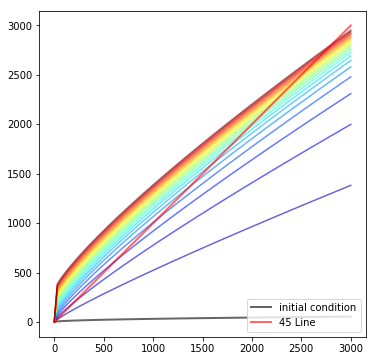

In [388]:
dpsm.graph_agent_value_fun_sequence(n = 20)


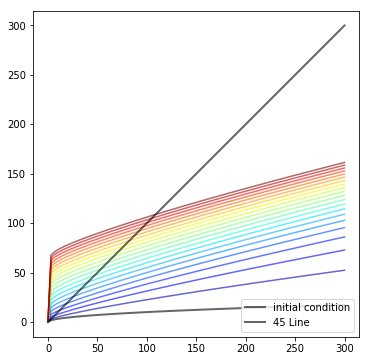

In [395]:
dpsm.graph_principal_value_fun_sequence(n = 20)

In [413]:
# Solving the Model
dpsm.agent_scenario()
#dpsm.principal_scenario()

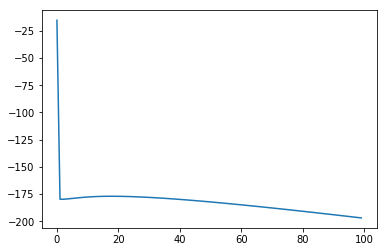

423

415

In [414]:
#Checking out the Feasibility of investment

x ={}
for i,y in enumerate(dpsm.y_grid):
    xmax = dpsm.τ*y
    x[i] = dpsm.v_func(k= dpsm.v_kvalues[i] ,x =xmax,τ = dpsm.τ ,y =y )-dpsm.vstar_values[i]

import matplotlib.pylab as plt

plt.plot(*zip(*sorted(x.items())))
plt.show()
dpsm.vstar_iterations
dpsm.v_iterations

In [358]:
import numpy as np
from scipy.optimize import minimize
j = 80
y = dpsm.y_grid[j]
print('y is {}'.format(y))
τ = dpsm.τ
β = dpsm.β
print('xmax is {}'.format(τ*y))
print('kmax is {}'.format((1-τ)*y))

gv = interpolate.interp1d(dpsm.y_grid, dpsm.v_values,fill_value='extrapolate')
def objective2(params):
    k,x = params
    return -dpsm.U(y = y, k = k, τ = τ) - dpsm.β*np.mean( gv( dpsm.G(y = y, x =x, k = k) ) )
k_bound = (1e-10,(1-τ)*y)
x_bound = (1e-10,τ*y)
bnds = (k_bound, x_bound)
x0 = [(1-τ)*y/2,τ*y/2]
sol = minimize(objective2,x0=x0,method = 'SLSQP',bounds = bnds )
#sol.x
print('kstar is {} and xstar is {}'.format(sol.x[0],sol.x[1]))
print('Optimum Value is {}'.format(-objective2(sol.x)))
print('v* value is {}'.format(dpsm.vstar_values[j]))
print('v value is {}'.format(dpsm.v_values[j]))

y is 808.08081
xmax is 242.424243
kmax is 565.656567
kstar is 0.03961161883771011 and xstar is 242.424243
Optimum Value is 626.4387751072112
v* value is 769.1202257835541
v value is 557.8311255302461


In [97]:

import numpy as np
from scipy.optimize import minimize
y = dpsm.y_grid[80]
print('y is {}'.format(y))
τ = dpsm.τ
β = dpsm.β
print('xmax is {}'.format(τ*y))
print('kmax is {}'.format((1-τ)*y))
#fv = lambda x: np.interp(x, dpsm.y_grid, dpsm.v_values)
gv = interpolate.interp1d(dpsm.y_grid, dpsm.v_values,fill_value='extrapolate')

def objective(params):
    k,x = params
    return x

def constraint1(params):
    k,x = params
    return dpsm.U(y = y, k = k, τ = τ) + dpsm.β*np.mean( gv( dpsm.G(y = y, x =x, k = k) ) ) - vstar

k_bound = (1e-10,(1-τ)*y)
x_bound = (1e-10,τ*y)
bnds = (k_bound, x_bound)
x0 = [(1-τ)*y/2,τ*y/2]
con1 = {'type':'ineq','fun':constraint1}
cons = ([con1])
sol = minimize(objective,x0=x0,method = 'SLSQP',bounds = bnds, constraints= cons )
#sol
#sol.x
print('kstar is {} and xstar is {}'.format(sol.x[0],sol.x[1]))
print('Constraint - Vstar is {}'.format(constraint1(sol.x)))
print('consumer value is {}'.format(constraint1(sol.x)+vstar))

y is 80.80808272727272
xmax is 24.242424818181814
kmax is 56.5656579090909
kstar is 9.922947011751903 and xstar is 10.408350998942286
Constraint - Vstar is -2.323213408317315e-07
consumer value is 90.68584320090467


In [ ]:
xgrid = np.linspace(0,τ*y,20)
kgrid = np.linspace(0,(1-τ)*y,20)

megadic = {}
count = 0
for i,k in enumerate(kgrid):
    for j,x in enumerate(xgrid):
        megadic[count] = (k,x,-objective2([k,x]))
        count+=1

In [99]:
{k: v for k, v in megadic.items() if v[2] >= vstar and v[2] < 92 }

{10: (0.0, 12.759170956937798, 90.926806354865718),
 169: (23.817119119617221, 11.483253861244018, 91.641566278082337),
 189: (26.794259009569373, 11.483253861244018, 90.884495352195231),
 250: (35.725678679425833, 12.759170956937798, 91.603657397625213),
 311: (44.657098349282286, 14.035088052631577, 91.656793835380782),
 372: (53.588518019138746, 15.311005148325357, 90.878081661374694)}

In [360]:
import numpy as np
from scipy.optimize import minimize
j = 80
vstar = dpsm.vstar_values[j]
y = dpsm.y_grid[j]
print('y is {}'.format(y))
τ = dpsm.τ
β = dpsm.β
print('xmax is {}'.format(τ*y))
print('kmax is {}'.format((1-τ)*y))
#fv = lambda x: np.interp(x, dpsm.y_grid, dpsm.v_values)
fv = interpolate.interp1d(dpsm.y_grid, dpsm.v_values,fill_value='extrapolate')
fw = interpolate.interp1d(dpsm.y_grid, dpsm.w_values,fill_value='extrapolate')

def objective(params):
    k,x = params
    return x

def constraint1(params):
    k,x = params
    return dpsm.U(y = y, k = k, τ = τ) + dpsm.β*np.mean( fv( dpsm.G(y = y, x =x, k = k) ) ) - vstar

k_bound = (1e-10,(1-τ)*y)
x_bound = (1e-10,τ*y)
bnds = (k_bound, x_bound)
x0 = [(1-τ)*y/2,τ*y/2]
con1 = {'type':'ineq','fun':constraint1}
cons = ([con1])
sol = minimize(objective,x0=x0,method = 'SLSQP',bounds = bnds, constraints= cons )
#sol
#sol.x
print('kstar is {} and xstar is {}'.format(sol.x[0],sol.x[1]))
print('Constraint - Vstar is {}'.format(constraint1(sol.x)))
print('consumer value is {}'.format(constraint1(sol.x)+vstar))

y is 808.08081
xmax is 242.424243
kmax is 565.656567
kstar is 0.07768554473239547 and xstar is 242.4242429999955
Constraint - Vstar is -142.67546868263457
consumer value is 626.4447571009196
